<a href="https://colab.research.google.com/github/samer-glitch/Federated-Governance-and-Provenance-Scoring-for-Trustworthy-AI-A-Metadata-Ledger-Approach/blob/main/Hub%E2%80%91Side_Aggregation_%26_Alerts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================================
#  HUB – Central Merge & Alert                 (Cell 1 / 2)
#  Run whenever branches finish uploading
# ==========================================================
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os, glob, pandas as pd

LEDGER_DIR  = "/content/drive/MyDrive/TADP_Ledgers/"
CENTRAL_DIR = "/content/drive/MyDrive/TADP_Central/"
os.makedirs(CENTRAL_DIR, exist_ok=True)
CENTRAL_CSV = os.path.join(CENTRAL_DIR, "central_ledger.csv")

# 1) gather every *_ledger.csv sent by branches --------------
csv_files = glob.glob(os.path.join(LEDGER_DIR, "*_ledger.csv"))
if not csv_files:
    raise RuntimeError("❌ No branch ledgers found in TADP_Ledgers")

df = pd.concat(pd.read_csv(f) for f in csv_files)

# 2) de‑duplicate on tx_id (ledger rows are append‑only) -----
if "tx_id" in df.columns:
    df.drop_duplicates(subset=["tx_id"], inplace=True)
else:                                         # legacy fallback
    df.drop_duplicates(inplace=True)

# 3) sort and save authoritative ledger ----------------------
df.sort_values("timestamp", inplace=True)
df.to_csv(CENTRAL_CSV, index=False)
print(f"✅ Merged ledger → {CENTRAL_CSV}")
print("  Total rows:", len(df))

# 4) full ledger tail (optional) -----------------------------
print("\n🔍 Ledger preview (tail):")
display(df)            # comment‑out if not needed

# 5) alert table – bundles needing human attention ----------
pending = df[df["trust_category"].isin(
            ["Moderate", "Low‑Moderate", "Low"])]

if pending.empty:
    print("\n✅ All bundles in ACCEPT band – no action required.")
else:
    print("\n⚠️ Bundles requiring review / quarantine:")
    display(pending[["timestamp","client_id","dataset_id",
                     "pscore","trust_category","rationale"]])


Mounted at /content/drive
✅ Merged ledger → /content/drive/MyDrive/TADP_Central/central_ledger.csv
  Total rows: 8

🔍 Ledger preview (tail):


,tx_id,timestamp,client_id,dataset_id,dataset_name,pscore,trust_category,rationale,version_id,record_count,dimension_details
0,fd6db7f9-fc5a-4475-8027-cf664ac84cde,2025-05-05T14:11:12.191512,BranchA,A1,A1.csv,4.51,High,ACCEPT,v1.0,8140,{'Dimension1': {'attrs': {'SourceReputation': ...
0,8c86a85b-b1a0-4bae-b759-db009b0b1ffb,2025-05-05T14:12:13.389700,BranchB,B1,B1.csv,3.10,Moderate,REVIEW,v1.0,6512,{'Dimension1': {'attrs': {'SourceReputation': ...
0,6c87ba2c-215e-49c4-bb2c-d87ad60dcff5,2025-05-05T14:13:00.828667,BranchC,C1,C1.csv,3.10,Moderate,REVIEW,v1.0,4232,{'Dimension1': {'attrs': {'SourceReputation': ...
0,70c36b84-57c6-425d-9ab1-0b034b886d39,2025-05-05T14:14:03.229552,BranchD,D1,D1.csv,1.81,Low‑Moderate,QUARANTINE,v1.0,2279,{'Dimension1': {'attrs': {'SourceReputation': ...
1,7ea38af6-657b-4041-b518-5d52d10074cc,2025-05-05T14:14:22.036503,BranchA,A2,A2.csv,4.62,High,ACCEPT,v1.1,2604,{'Dimension1': {'attrs': {'SourceReputation': ...
1,f9c1f22e-95c1-4cca-8373-99ff0da8740b,2025-05-05T14:14:37.131093,BranchB,B2,B2.csv,1.85,Low‑Moderate,QUARANTINE,v1.1,3907,{'Dimension1': {'attrs': {'SourceReputation': ...
1,6a619386-8ecb-4db1-89f1-126a63ac3881,2025-05-05T14:14:46.648432,BranchD,D2,D2.csv,4.72,High,ACCEPT,v1.1,1631,{'Dimension1': {'attrs': {'SourceReputation': ...
2,17d5e593-84fc-434e-8c9a-55f331a01aad,2025-05-05T14:14:59.056546,BranchA,A3,A3.csv,2.81,Low‑Moderate,QUARANTINE,v1.2,3256,{'Dimension1': {'attrs': {'SourceReputation': ...



⚠️ Bundles requiring review / quarantine:


,timestamp,client_id,dataset_id,pscore,trust_category,rationale
0,2025-05-05T14:12:13.389700,BranchB,B1,3.10,Moderate,REVIEW
0,2025-05-05T14:13:00.828667,BranchC,C1,3.10,Moderate,REVIEW
0,2025-05-05T14:14:03.229552,BranchD,D1,1.81,Low‑Moderate,QUARANTINE
1,2025-05-05T14:14:37.131093,BranchB,B2,1.85,Low‑Moderate,QUARANTINE
2,2025-05-05T14:14:59.056546,BranchA,A3,2.81,Low‑Moderate,QUARANTINE


In [ ]:
# ---------- alert table ---------------------------------------------
review = df[df["trust_category"].isin(["Moderate","Low‑Moderate","Low"])]
if review.empty:
    print("✅  All bundles High trust.")
else:
    print("⚠️  Bundles needing action:")
    display(review[["timestamp","client_id","dataset_id",
                    "pscore","trust_category","rationale"]])

⚠️  Bundles needing action:


,timestamp,client_id,dataset_id,pscore,trust_category,rationale
0,2025-05-05T14:12:13.389700,BranchB,B1,3.10,Moderate,REVIEW
0,2025-05-05T14:13:00.828667,BranchC,C1,3.10,Moderate,REVIEW
0,2025-05-05T14:14:03.229552,BranchD,D1,1.81,Low‑Moderate,QUARANTINE
1,2025-05-05T14:14:37.131093,BranchB,B2,1.85,Low‑Moderate,QUARANTINE
2,2025-05-05T14:14:59.056546,BranchA,A3,2.81,Low‑Moderate,QUARANTINE


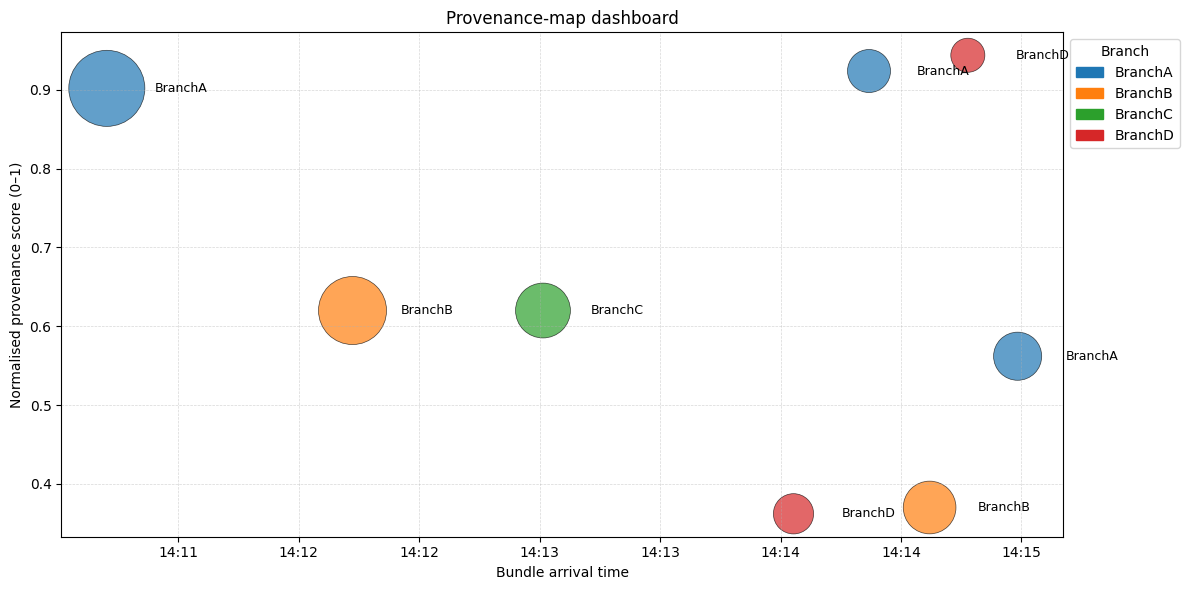

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# 1) Load the authoritative ledger
LEDGER_CSV = "/content/drive/MyDrive/TADP_Central/central_ledger.csv"
df = pd.read_csv(LEDGER_CSV, parse_dates=["timestamp"])

# 2) Assign each branch a distinct colour
branch_colors = {
    "BranchA": "#1f77b4",
    "BranchB": "#ff7f0e",
    "BranchC": "#2ca02c",
    "BranchD": "#d62728"
}
df["color"] = df["client_id"].map(branch_colors).fillna("gray")

# 3) Normalize scores and compute bubble sizes
df["pscore_norm"] = df["pscore"] / 5.0
df["area"] = (df["record_count"] / df["record_count"].max()) * 3000

# 4) Create the bubble plot
fig, ax = plt.subplots(figsize=(12,6))
scatter = ax.scatter(
    df["timestamp"],
    df["pscore_norm"],
    s=df["area"],
    c=df["color"],
    alpha=0.7,
    edgecolors="k",
    linewidths=0.5,
)

# 5) Annotate each bubble with its branch
for _, row in df.iterrows():
    ax.text(
        row["timestamp"] + pd.Timedelta(minutes=0.2),
        row["pscore_norm"],
        row["client_id"],
        fontsize=9,
        va="center"
    )

# 6) Build a legend using colour patches
legend_handles = [
    mpatches.Patch(color=col, label=branch)
    for branch, col in branch_colors.items()
]
ax.legend(
    handles=legend_handles,
    title="Branch",
    loc="upper left",
    bbox_to_anchor=(1,1)
)

# 7) Tidy up axes
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_title("Provenance-map dashboard")
ax.set_xlabel("Bundle arrival time")
ax.set_ylabel("Normalised provenance score (0–1)")
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# ATTENTION READ BEFORE RUNNIN THIS CELL
# If I want to wipe all old ledgers

import glob, os

# adjust these paths if yours differ
LEDGER_DIR  = "/content/drive/MyDrive/TADP_Ledgers/"
CENTRAL_DIR = "/content/drive/MyDrive/TADP_Central/"

# delete every file in both folders
for f in glob.glob(os.path.join(LEDGER_DIR, "*")):
    os.remove(f)
for f in glob.glob(os.path.join(CENTRAL_DIR, "*")):
    os.remove(f)

print("✅  Cleared all TADP_Ledgers & TADP_Central files.")


✅  Cleared all TADP_Ledgers & TADP_Central files.
